In [4]:
#import the packages
import numpy as np
import pandas as pd

### Euclidean distance- the distance between two data points

In [13]:
#Function to compute euclidean distance
def euclidean(v1, v2):
    #Convert 1-D Python lists to numpy vectors
    v1 = np.array(v1)
    v2 = np.array(v2)
    
    #Compute vector which is the element wise square of the distance
    diff = np.power(np.array(v1) - np.array(v2), 2)
    
    #Perform summation of the elements of the above vector
    sigma_val = np.sum(diff)
    
    #Compute square root and return final euclidean score
    euclid_score = np.sqrt(sigma_val)
    
    return euclid_score

In [6]:
#Define 3 users with ratings 5 movies
u1 = [5,1,2,4,5]
u2 = [1,5,4,2,1]
u3 = [5,2,2,4,4]

In [7]:
#Check the euclidean distance for user1 and user2 
euclidean(u1, u2)

7.483314773547883

In [9]:
#Check the euclidean distance between user1 and user3
euclidean(u1, u3)

1.4142135623730951

In [10]:
#Check the euclidean distance between user2 and user3
euclidean(u2,u3)

6.48074069840786

In [11]:
#User 1 and User 3 has smaller euclidean distance

### Pearson Correlation

In [14]:
alice = [1,1,3,2,4]
bob = [2,2,4,3,5]

euclidean(alice, bob)

2.23606797749979

In [15]:
eve = [5,5,3,4,2]

euclidean(eve, alice)

6.324555320336759

In [16]:
from scipy.stats import pearsonr

pearsonr(alice, bob)

(0.9999999999999999, 1.4042654220543602e-24)

In [17]:
pearsonr(alice, eve)

(-0.9999999999999999, 1.4042654220543602e-24)

In [18]:
pearsonr(bob, eve)

(-0.9999999999999999, 1.4042654220543602e-24)

### Cosine Similarity
### K-Means Clustering

In [20]:
#Import the function that enables us to plot cluster
from sklearn.datasets.samples_generator import make_blobs

#Get points such that they form 3 visually separable clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.50, random_state=42)

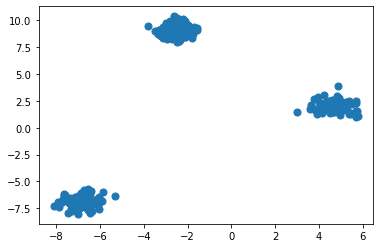

In [27]:
#Plot the points on a scatterplot
import matplotlib.pyplot as plt
%matplotlib inline 

plt.scatter(X[:, 0], X[:,1], s=50)

In [29]:
#Import the k-means class
from sklearn.cluster import KMeans

#Initialize the K-Means object. Set number of cluster to 3,
#centroid initialization as "random" and "maximum" iterations to 10
kmeans = KMeans(n_clusters=3, init="random", max_iter=10)

#Compute the K-Means clustering
kmeans.fit(X)

KMeans(init='random', max_iter=10, n_clusters=3)

In [30]:
#Predict the classes for every point
y_pred = kmeans.predict(X)
y_pred

array([2, 2, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 1,
       0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0,
       1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2,
       0, 1, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1,
       0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 1,
       1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0,
       1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 2, 2])

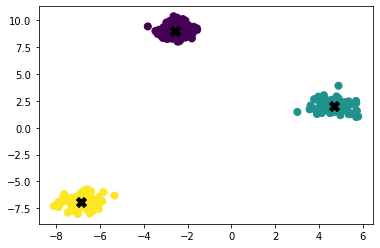

In [32]:
#Plot the data points again but with different colors for different classes
plt.scatter(X[:,0], X[:,1], c=y_pred, s=50)

#Get the list of the final centroids
centroids = kmeans.cluster_centers_

#Plot the centroids onto the same scatterplot
plt.scatter(centroids[:,0], centroids[:,1], c="black", s=100, marker='X')

<AxesSubplot:>

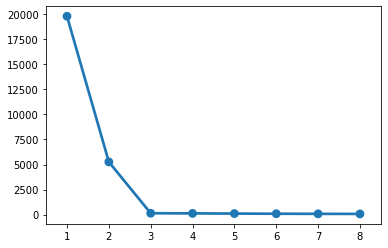

In [33]:
#List that will hold the sum of wquare values for different cluster sizess
ss = []

#We will compute SS for cluster sizes between 1 and 0
for i in range(1,9):
    
    #Initialize the KMeans object and call the fit method to compute clusters
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=10, init="random").fit(X)
    
    #Append the values of SS for a particular iteration into the ss list
    ss.append(kmeans.inertia_)
    
#Plot the Elbow plot of SS v/s K
import seaborn as sns

sns.pointplot(x=[j for j in range (1,9)], y=ss)

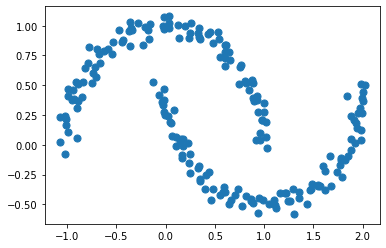

In [34]:
#Import the half moon function from scikit-learn
from sklearn.datasets import make_moons

#Get access to points using the make_moons function
X_m, y_m = make_moons(200, noise=.05, random_state=0)

#Plot the two half moon cluster
plt.scatter(X_m[:,0], X_m[:,1], s=50)

In [37]:
#Initialize K-Means Object with K=2( for two half moons) and fit to our data
kmm = KMeans(n_clusters=2, init="random", max_iter=10)
kmm.fit(X_m)

#Predict the classes for the data points
y_m_pred = kmm.predict(X_m)

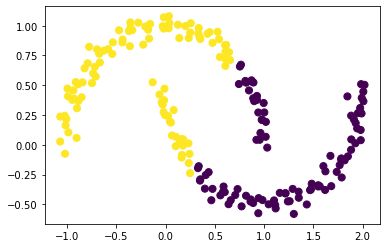

In [38]:
#Plot the colored clusters as identified by K-Means
plt.scatter(X_m[:,0], X_m[:,1], c=y_m_pred, s=50)

C:\Users\student\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


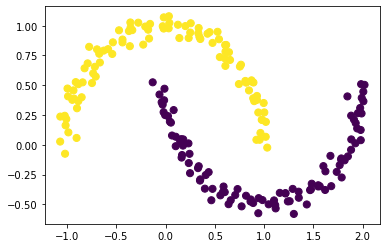

In [41]:
#Import Spectral Clustering from scikit-learn
from sklearn.cluster import SpectralClustering

#Define the Spectral Clustering Model
model = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")

#Fit and predict the labels
y_m_sc = model.fit_predict(X_m)

#Plot the colored clusters as identified by Spectral Clustering
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_sc, s=50)

### Dimensionality reduction PCA (principal coponent analysis)

In [42]:
#Load the Iris datasets into pandas  DataFrame
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  names = ['sepal_length','sepal_width','petal_length','petal_width','class'])

#Display iris head
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
#Import standard scaler from sklern
from sklearn.preprocessing import StandardScaler

#Separate the features and labels
X = iris.drop("class",axis=1)
y = iris["class"]

#Scale the features of X
X = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [47]:
#Import PCA
from sklearn.decomposition import PCA

#Initialize a PCA object to transform into the 2D Space
pca = PCA(n_components=2)

#Apply PCA
pca_iris = pca.fit_transform(X)
pca_iris = pd.DataFrame(pca_iris, columns=["PC1","PC2"])

pca_iris.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


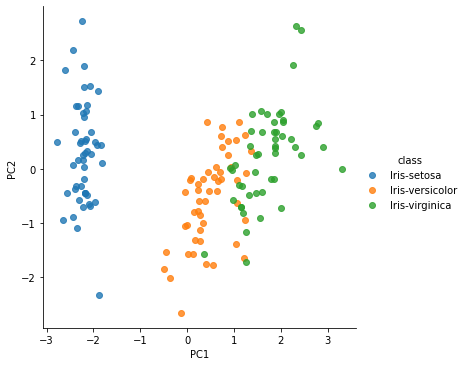

In [49]:
#Concatenate the class variable
pca_iris = pd.concat([pca_iris, y], axis=1)

#Display the scatterplot
sns.lmplot(x="PC1", y="PC2", data=pca_iris, hue="class", fit_reg=False)